In [4]:
# importing libraries and set standards
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import statistics as stat

plt.rcParams['figure.figsize'] = 19, 15
plt.rcParams['xtick.labelsize']=45
plt.rcParams['ytick.labelsize']=45
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'figure.autolayout': False})
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['font.family'] = 'Arial'

In [5]:
Slopes_noRP = []
Slopes_RP = []

with open("Slopes_noRP.txt", "r") as file:
    for line in file:
        Slopes_noRP.append(float(line.rstrip()))

with open("Slopes_RP.txt", "r") as file:
    for line in file:
        Slopes_RP.append(float(line.rstrip()))
        
        
GFP_noRP = []
GFP_RP = []

with open("GFP_noRP.txt", "r") as file:
    for line in file:
        GFP_noRP.append(float(line.rstrip()))

with open("GFP_RP.txt", "r") as file:
    for line in file:
        GFP_RP.append(float(line.rstrip()))
        
        
slopesGFP_noRP = pd.DataFrame({'GFP': GFP_noRP, 'slopes': Slopes_noRP})
slopesGFP_noRP_new = slopesGFP_noRP.drop(slopesGFP_noRP[slopesGFP_noRP['GFP'] >= 800].index)
slopesGFP_noRP_corrected = slopesGFP_noRP_new.drop(slopesGFP_noRP_new[slopesGFP_noRP_new['GFP'] <= 600].index)


slopesGFP_RP = pd.DataFrame({'GFP': GFP_RP, 'slopes': Slopes_RP})
slopesGFP_RP_new = slopesGFP_RP.drop(slopesGFP_RP[slopesGFP_RP['GFP'] >= 800].index)
slopesGFP_RP_corrected = slopesGFP_RP_new.drop(slopesGFP_RP_new[slopesGFP_RP_new['GFP'] <= 600].index)

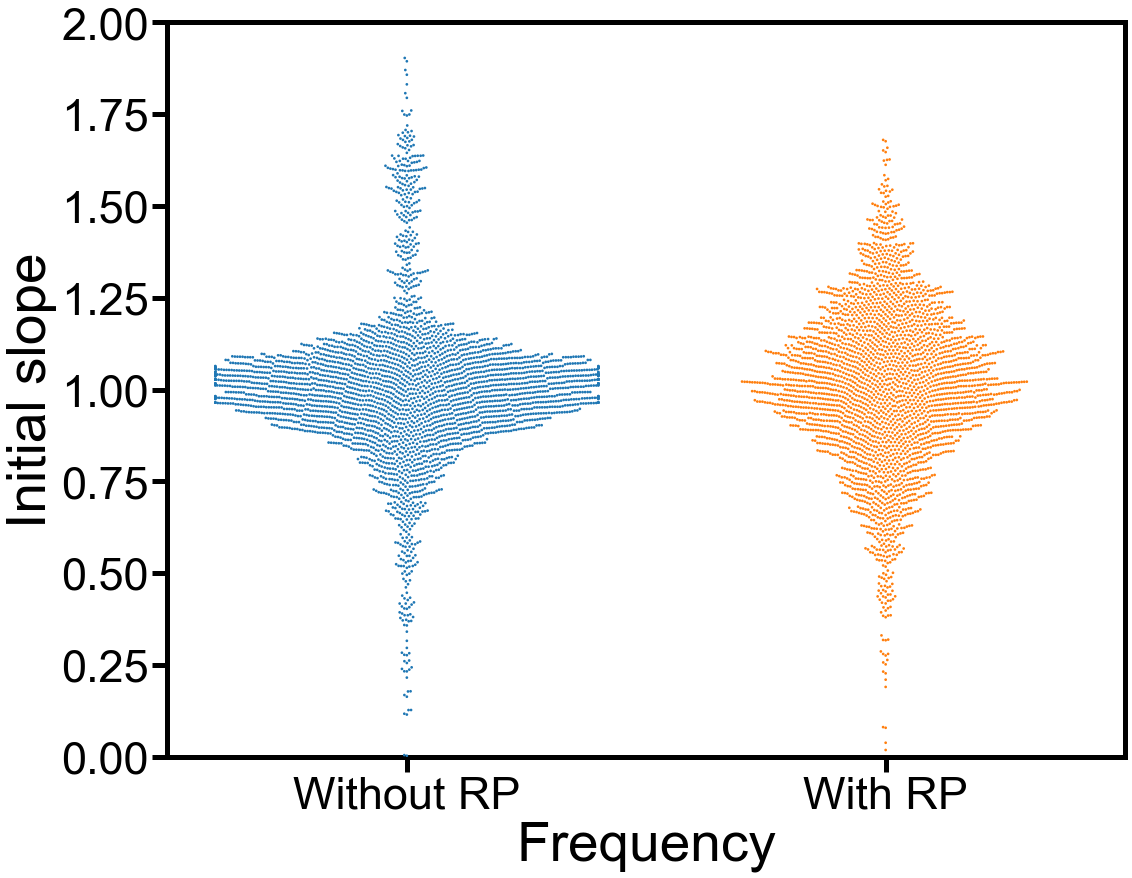

In [6]:
mean_noRP = sum(Slopes_noRP)/len(Slopes_noRP)
Slopesnormed_noRP = [item/mean_noRP for item in Slopes_noRP]
Group_noRP = ['Without RP']*len(Slopesnormed_noRP)
data_noRP = pd.DataFrame({'Group': Group_noRP, 'data': Slopesnormed_noRP})

########################################################################################
#limited
mean_noRP = sum(Slopes_noRP)/len(Slopes_noRP)
Slopesnormed_noRP = [item/mean_noRP for item in Slopes_noRP]
Group_noRP = ['Without RP']*len(Slopesnormed_noRP)
data_noRP = pd.DataFrame({'Group': Group_noRP, 'data': Slopesnormed_noRP})

########################################################################################

mean_RP = sum(Slopes_RP)/len(Slopes_RP)
Slopesnormed_RP = [item/mean_RP for item in Slopes_RP]
Group_RP = ['With RP']*len(Slopesnormed_RP)
data_RP = pd.DataFrame({'Group': Group_RP, 'data': Slopesnormed_RP})

data_all = pd.concat([data_noRP, data_RP])
ax = sns.swarmplot(x='Group', y='data', data=data_all, size=2.7)


GFPmean_noRP = sum(GFP_noRP)/len(GFP_noRP)
GFPnormed_noRP = [item/GFPmean_noRP for item in GFP_noRP]
GFPGroup_noRP = ['Without RP']*len(GFPnormed_noRP)
GFPdata_noRP = pd.DataFrame({'Group': GFPGroup_noRP, 'data': GFPnormed_noRP})

GFPmean_RP = sum(GFP_RP)/len(GFP_RP)
GFPnormed_RP = [item/GFPmean_RP for item in GFP_RP]
GFPGroup_RP = ['With RP']*len(GFPnormed_RP)
GFPdata_RP = pd.DataFrame({'Group': GFPGroup_RP, 'data': GFPnormed_RP})

GFPdata_all = pd.concat([GFPdata_noRP, GFPdata_RP])
#ax = sns.swarmplot(x='Group', y='data', data=GFPdata_all, size=2.75)


plt.xlabel('Frequency', fontsize=55)
plt.ylabel('Initial slope', fontsize=55)
ax.set_ylim(0, 2)
#plt.title('Stripplots of deviation to mean', fontsize=40)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)
plt.tick_params(axis='both', length=15, width=5)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)
plt.savefig("Both_Slopes_Swarm.svg",dpi=100, format='svg')
#plt.savefig("Both_GFP.svg",dpi=100, format='svg')
# show plot
plt.show()